In [2]:
# Wide&Deep模型

2.9.1
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.0
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

In [3]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)
print(x_train.shape,y_train.shape)
print(x_valid.shape,y_valid.shape)
print(x_test.shape,y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_valid_scaled=scaler.transform(x_valid)
x_test_scaled=scaler.transform(x_test)

In [6]:
print(x_train.shape[1:])

(8,)


In [92]:
# 搭建deep模型  input函数返回output
input=keras.layers.Input(shape=x_train.shape[1:])
print(input)
# input作为输入  Dense对象调用call方法返回output
hidden1=keras.layers.Dense(30,activation='relu')(input)
hidden2=keras.layers.Dense(30,activation='relu')(hidden1)
print(hidden1.shape)
# 搭建wide模型
# 假设wide模型和deep模型的输入相同
concat=keras.layers.concatenate([input,hidden2])
output=keras.layers.Dense(1)(concat)

model=keras.models.Model(inputs=[input],outputs=[output])
print(model.summary())

KerasTensor(type_spec=TensorSpec(shape=(None, 8), dtype=tf.float32, name='input_13'), name='input_13', description="created by layer 'input_13'")
(None, 30)
Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_36 (Dense)               (None, 30)           270         ['input_13[0][0]']               
                                                                                                  
 dense_37 (Dense)               (None, 30)           930         ['dense_36[0][0]']               
                                                                                                  
 concatenate_12 (Concatenate)   (

In [93]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(0.001))
print(model.layers)

[<keras.engine.input_layer.InputLayer object at 0x0000023211F2E550>, <keras.layers.core.dense.Dense object at 0x0000023211F2E190>, <keras.layers.core.dense.Dense object at 0x0000023211F2EDF0>, <keras.layers.merging.concatenate.Concatenate object at 0x0000023211F2ED00>, <keras.layers.core.dense.Dense object at 0x0000023211F2E460>]


In [94]:
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-3)]
history=model.fit(x_train_scaled,y_train,
                  validation_data=(x_valid_scaled,y_valid),
                  epochs=100,callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.8542 - val_loss: 0.8724
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.7183 - val_loss: 0.7601
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6647 - val_loss: 0.7128
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6314 - val_loss: 0.6828
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6050 - val_loss: 0.6549
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5843 - val_loss: 0.6310
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5650 - val_loss: 0.6106
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5491 - val_loss: 0.5971
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5750
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5226 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3595 - val_loss: 0.3765
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3593 - val_loss: 0.3761
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3583 - val_loss: 0.3752
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3576 - val_loss: 0.3740
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3565 - val_loss: 0.3783
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3567 - val_loss: 0.3739
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3560 - val_loss: 0.3720
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3550 - val_loss: 0.3726
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3547 - val_loss: 0.3713
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3543 - val_loss: 

In [100]:
print(history.history)

{'loss': [1.854248285293579, 0.7183188199996948, 0.6647172570228577, 0.6314438581466675, 0.6049978733062744, 0.5842727422714233, 0.5650440454483032, 0.5490816235542297, 0.5346823930740356, 0.5225672721862793, 0.5120328664779663, 0.5016887187957764, 0.4928475022315979, 0.48565685749053955, 0.47734251618385315, 0.4719889461994171, 0.46531394124031067, 0.4606773853302002, 0.4552076458930969, 0.4513951539993286, 0.4470404088497162, 0.442171573638916, 0.43949127197265625, 0.43518349528312683, 0.4326595067977905, 0.42992502450942993, 0.426840215921402, 0.424355685710907, 0.4219732880592346, 0.4196445047855377, 0.4170798063278198, 0.41567718982696533, 0.4129461348056793, 0.4109078645706177, 0.4096145033836365, 0.4074152410030365, 0.40559378266334534, 0.40385687351226807, 0.402205228805542, 0.40064001083374023, 0.3991333246231079, 0.3974369764328003, 0.3962218165397644, 0.39465847611427307, 0.3931349217891693, 0.3919500410556793, 0.39079052209854126, 0.3888038098812103, 0.3882986605167389, 0.3

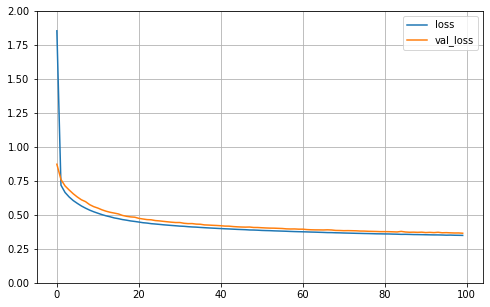

In [104]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
plot_learning_curves(history)

In [106]:
# 模型搭建的比较简单
print(model.evaluate(x_test_scaled,y_test,verbose=1))

162/162 [==============================] - 0s 799us/step - loss: 0.3696
0.36958539485931396
